# Support Vector Machine (practice)

**Author**: [Gilyoung Cheong](https://www.linkedin.com/in/gycheong/)

We use a [dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) to support vector machine (SVM) models in practice. We will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for manipulating dataframes.
*   [`numpy`](https://numpy.org/) for various mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for applying machine learning algorithms.
*   [`seaborn`](https://seaborn.pydata.org/) for data visualization.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting.

In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt


In [10]:
file_path = "https://raw.githubusercontent.com/gycheong/machine_learning/main/data/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)

df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
725,Female,19.994543,1.537739,39.101805,no,yes,1.118436,3.000000,Sometimes,no,1.997744,no,2.432443,1.626194,Sometimes,Public_Transportation,Insufficient_Weight
915,Female,38.692265,1.548178,62.341438,yes,yes,2.956671,2.965494,Sometimes,no,2.868132,no,0.000000,0.549250,Sometimes,Automobile,Overweight_Level_I
554,Male,16.198153,1.691007,52.629374,no,yes,2.000000,2.000986,Sometimes,no,2.673835,no,0.992950,0.474836,Sometimes,Public_Transportation,Insufficient_Weight
586,Female,18.000000,1.700000,50.000000,no,yes,1.031149,3.000000,Sometimes,no,1.963628,no,0.028202,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
1660,Male,24.178638,1.867410,121.684311,yes,yes,2.954417,2.657720,Sometimes,no,2.104696,no,0.870056,0.000000,Sometimes,Public_Transportation,Obesity_Type_II


In [7]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [17]:
print(df['CAEC'].value_counts())
print(df['SCC'].value_counts())
print(df['CALC'].value_counts())
print(df['MTRANS'].value_counts())
print(df['NObeyesdad'].value_counts())

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


From above, we see that our dataframe (i.e., the object df) has the following parameters.

| Parameter | Description | Content type |
|---|----|---|
| Gender |  | string ('Male' or 'Female') |
| Age |  | float |
| Height | | float |
| Weight | | float |
| family_history_with_overweight | Has a family member suffered or suffers from overweight?	 | str ('yes' or 'no') |
| FAVC | Do you eat high caloric food frequently? | str ('yes' or 'no') | 
| FCVC | Do you usually eat vegetables in your meals? | float (less number means more) |
| NCP | How many main meals do you have daily? | float |
| CAEC | Do you eat any food between meals? | str ('Always', 'Frequently', 'Somtimes', 'no') |
| SMOKE | Unemployment rate | str ('yes' or 'no') |
| CH2O | How much water do you drink daily? | float |
| SCC | Do you monitor the calories you eat daily? | str ('yes' or 'no') |
| FAF | How often do you have physical activity? | float |
| TUE | How much time do you use technological devices such as cell phone, videogames, television, computer and others? | float |
| CALC | How often do you drink alcohol? | str ('Always', 'Frequently', 'Somtimes', 'no') |
| MTRANS | Which transportation do you usually use? | str ('Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike')) |
| NObeyesdad | Obesity level | str ('Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight') |

## Correlations

We quickly look at what parameters are correlated to obesity level. In order to do so we need to make string values numeric first.

In [22]:
df['Gender'].replace({'Male': 0, 'Female' : 1}, inplace=True)
df['Gender']

C:\Users\Gil\AppData\Local\Temp\ipykernel_948\471491882.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male': 0, 'Female' : 1}, inplace=True)


0       1
1       1
2       0
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Gender, Length: 2111, dtype: int64

In [24]:
df.replace({
'yes' : 1,
'no' : 0
}, inplace=True)

df['family_history_with_overweight']

0       1
1       1
2       1
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: family_history_with_overweight, Length: 2111, dtype: int64

In [26]:
df.replace({'Always' : 3,
            'Frequently' : 2,
            'Sometimes' : 1,
            'no' : 0}, inplace=True)

df['CALC']

C:\Users\Gil\AppData\Local\Temp\ipykernel_948\2259023709.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Always' : 3,


0       0
1       1
2       2
3       2
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: CALC, Length: 2111, dtype: int64

In [52]:
df['MTRANS'].replace({'Walking' : 4,
                      'Bike' : 3,
                      'Public_Transportation' : 2,
                      'Motorbike' : 1, 
                      'Automobile' : 0, 
                      }, inplace=True)

# The score gives higher value for trasportation that generally requires more calories
df['MTRANS']

0       2
1       2
2       2
3       4
4       2
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: MTRANS, Length: 2111, dtype: int64

In [33]:
df['NObeyesdad'].replace({'Obesity_Type_III': 7, 
                  'Obesity_Type_II': 6, 
                  'Obesity_Type_I': 5, 
                  'Overweight_Level_II': 4, 
                  'Overweight_Level_I': 3, 
                  'Normal_Weight': 2, 
                  'Insufficient_Weight': 1}, inplace=True)

In [34]:
df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,-0.048394,-0.618466,-0.161668,-0.102512,-0.064934,0.274505,-0.067600,0.091543,-0.044698,-0.107930,0.102633,-0.189607,-0.017269,0.007616,0.110158,0.031464
Age,-0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,-0.568687,0.282913
Height,-0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,-0.054537,0.133565
Weight,-0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,-0.021611,0.913251
family_history_with_overweight,-0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,-0.110092,0.505148
FAVC,-0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,-0.117427,0.247793
FCVC,0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,0.058673,0.227759
NCP,-0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,-0.044714,0.026690
CAEC,0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,0.064635,-0.329350
SMOKE,-0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,-0.007986,0.003442


The key features that are correlated to the obesity level are:
* Age, 
* family_history_with_overweight, 
* FAVC (high caloric food consumption),
* FCVC (vegetable consumption--inverse), 
* NCP (number of main meals a day), 
* CAEC (food between meals).

**Remark**. Of course, our model becomes much better when we include Weight, but the level of obesity is determined by weight and height, so we purposely exclude them to see interesting relationships of the level of obesity with other features. Later, we shall see how our model becomes much better when we include Weight as one of the input features.

## Constructing models

We first create a binary feature for our SVM model:

In [118]:
df['Obese'] = df['NObeyesdad']

for i in range(8):
    if i >= 5:
        df['Obese'].replace({i : 1}, inplace=True)
    else:
        df['Obese'].replace({i : 0}, inplace=True)

C:\Users\Gil\AppData\Local\Temp\ipykernel_948\660135157.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Obese'].replace({i : 0}, inplace=True)
C:\Users\Gil\AppData\Local\Temp\ipykernel_948\660135157.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

We then reconsider the correlations with the new feature 'Obese'. From below we realize that we may consider the following features for our input:
* Age, 
* family_history_with_overweight, 
* FAVC (high caloric food consumption),
* CAEC (food between meals).

In [156]:
df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obese
Gender,1.000000,-0.048394,-0.618466,-0.161668,-0.102512,-0.064934,0.274505,-0.067600,0.091543,-0.044698,-0.107930,0.102633,-0.189607,-0.017269,0.007616,0.110158,0.031464,0.001436
Age,-0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,-0.568687,0.282913,0.217473
Height,-0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,-0.054537,0.133565,0.137413
Weight,-0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,-0.021611,0.913251,0.793652
family_history_with_overweight,-0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,-0.110092,0.505148,0.416607
FAVC,-0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,-0.117427,0.247793,0.278355
FCVC,0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,0.058673,0.227759,0.174848
NCP,-0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,-0.044714,0.026690,0.037004
CAEC,0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,0.064635,-0.329350,-0.232819
SMOKE,-0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,-0.007986,0.003442,0.011578


We then separate the data that we shall use for our final test:

In [176]:
x, x_unbiased, y, y_unbiased = train_test_split(df[['Age', 'family_history_with_overweight', 'FAVC', 'CAEC']], df['Obese'], test_size=0.2, random_state=2)

We then run 5-fold cross-validation on x, y:

In [166]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
x_train = []
y_train = []
x_test = []
y_test = []
clf = []

for i, (train_index, test_index) in enumerate(kfold.split(x,y)):
    clf.append(svm.SVC(kernel='rbf', gamma=0.5))
    
    x_train.append(x.iloc[train_index])
    y_train.append(y.iloc[train_index])

    x_test.append(x.iloc[test_index])
    y_test.append(y.iloc[test_index])

    clf[i].fit(x_train[i], y_train[i])

In [167]:
yhat = []
for i in range(len(x_train)):
    yhat.append(clf[i].predict(x_test[i]))


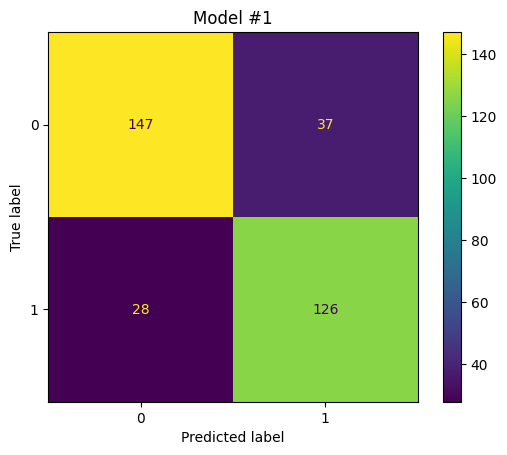

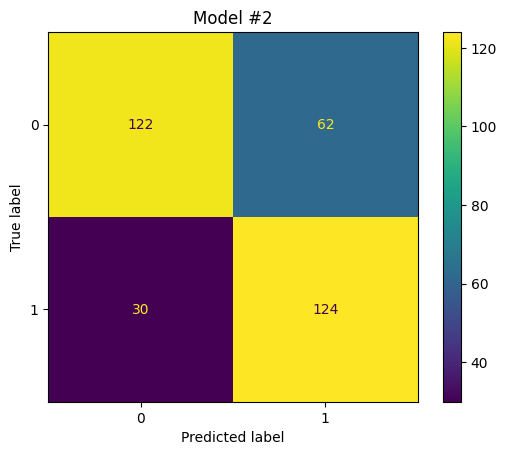

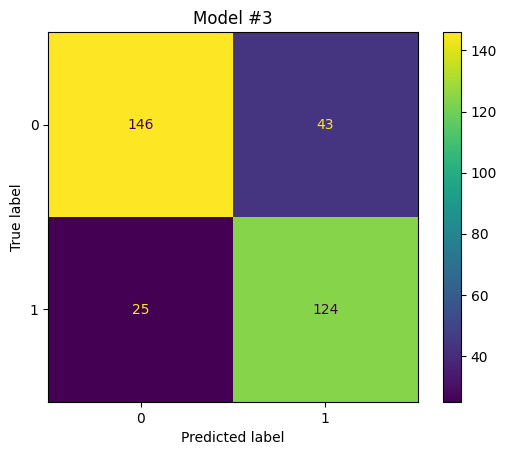

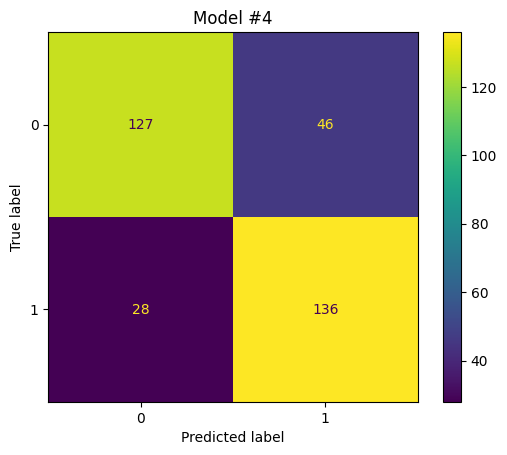

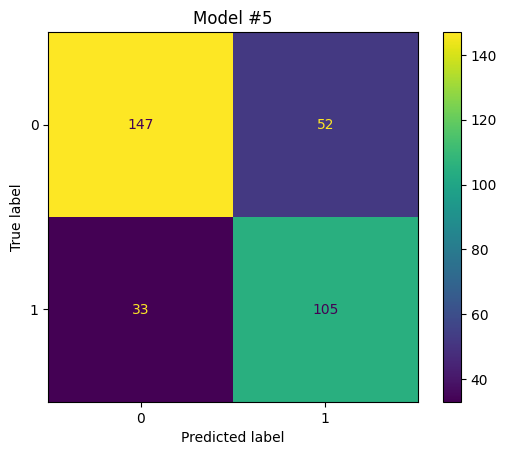

In [170]:
cm = []

for i in range(len(y_test)):
    cm.append(confusion_matrix(y_test[i], yhat[i]))

for i in range(len(cm)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm[i])
    disp.plot()
    plt.title("Model #"+str(i+1))
    

## Model Evaluation

We use [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) to measure which model performed the best:

In [173]:
for i in range(len(y_test)):
    print("F1-score for Model", i+1, ":", f1_score(y_test[i], yhat[i]))

F1-score for Model 1 : 0.7949526813880127
F1-score for Model 2 : 0.7294117647058823
F1-score for Model 3 : 0.7848101265822784
F1-score for Model 4 : 0.7861271676300579
F1-score for Model 5 : 0.711864406779661


We thus choose the first model (which has score closest to $1$) and try the last testing using the separated (unbiased) test set:

Text(0.5, 1.0, 'Final check for the selected model: Model 1')

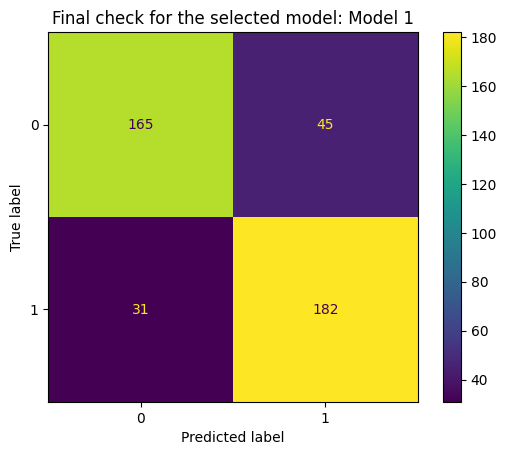

In [175]:
yhat_final = clf[0].predict(x_unbiased)
cm_final = confusion_matrix(y_unbiased, yhat_final)
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final)
disp_final.plot()
plt.title("Final check for the selected model: Model 1")

In [179]:
print("Final check for F1-score for Model 1:", f1_score(y_unbiased, yhat_final))

Final check for F1-score for Model 1: 0.8272727272727273


## What if we consider weight as an input?

We repeat our process above with one modification: we consider Weight as our input. It should not be surprising that the following model works so much better because the obestiy level is mainly determined by weight from the definition of [BMI](https://en.wikipedia.org/wiki/Body_mass_index).

In [180]:
X, X_unbiased, Y, Y_unbiased = train_test_split(df[['Weight', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC']], df['Obese'], test_size=0.2, random_state=2)

In [184]:
X_train = []
Y_train = []
X_test = []
Y_test = []
Clf = []

for i, (train_index, test_index) in enumerate(kfold.split(X,Y)):
    Clf.append(svm.SVC(kernel='rbf', gamma=0.5))
    
    X_train.append(X.iloc[train_index])
    Y_train.append(Y.iloc[train_index])

    X_test.append(X.iloc[test_index])
    Y_test.append(Y.iloc[test_index])

    Clf[i].fit(X_train[i], Y_train[i])

In [185]:
Yhat = []
for i in range(len(X_train)):
    Yhat.append(Clf[i].predict(X_test[i]))

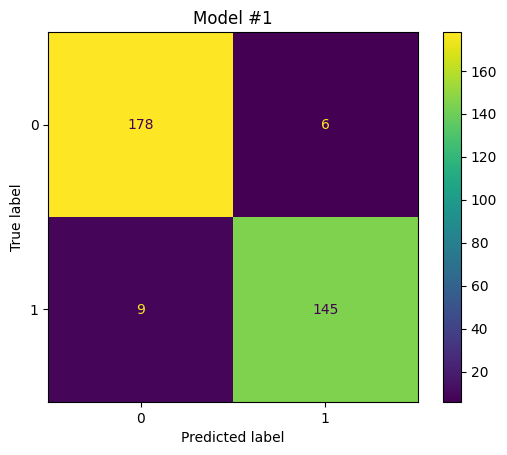

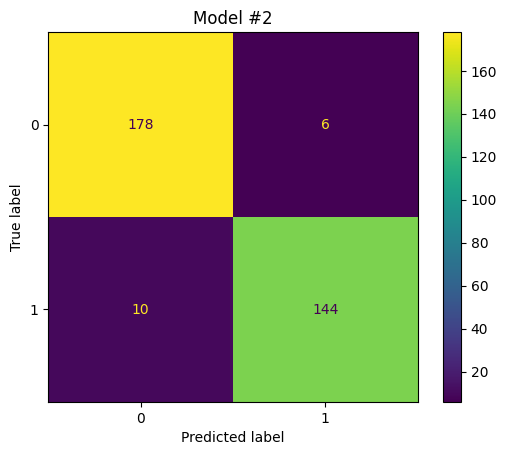

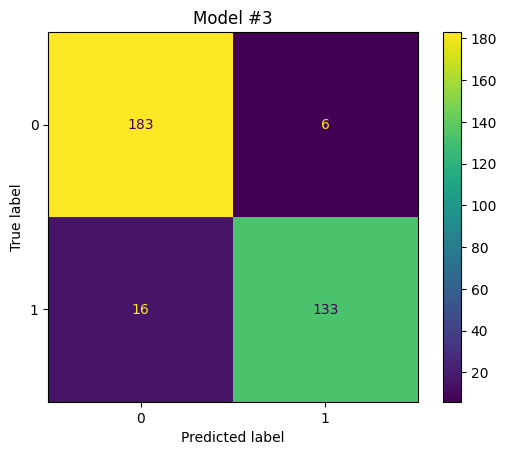

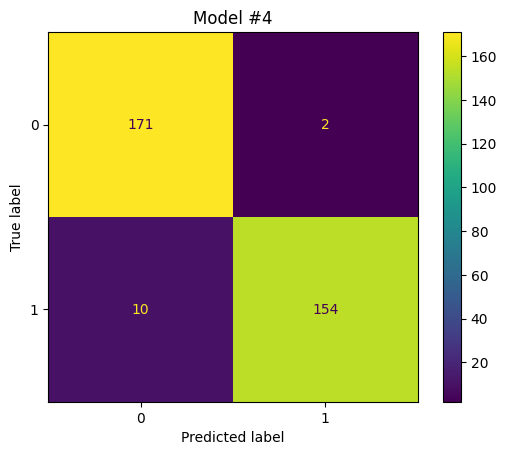

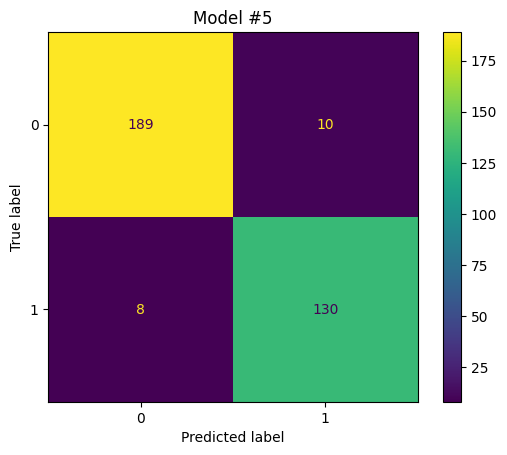

In [186]:
Cm = []

for i in range(len(Y_test)):
    Cm.append(confusion_matrix(Y_test[i], Yhat[i]))

for i in range(len(Cm)):
    Disp = ConfusionMatrixDisplay(confusion_matrix=Cm[i])
    Disp.plot()
    plt.title("Model #"+str(i+1))

In [187]:
for i in range(len(Y_test)):
    print("F1-score for Model", i+1, ":", f1_score(Y_test[i], Yhat[i]))

F1-score for Model 1 : 0.9508196721311475
F1-score for Model 2 : 0.9473684210526315
F1-score for Model 3 : 0.9236111111111112
F1-score for Model 4 : 0.9625
F1-score for Model 5 : 0.935251798561151


We choose Model 4 and perform the final check with the unbiased testing data:

Text(0.5, 1.0, 'Final check for the selected model: Model 1')

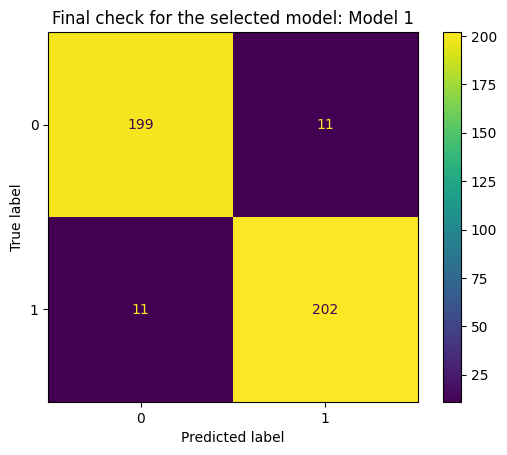

In [188]:
Yhat_final = Clf[0].predict(X_unbiased)
Cm_final = confusion_matrix(Y_unbiased, Yhat_final)
Disp_final = ConfusionMatrixDisplay(confusion_matrix=Cm_final)
Disp_final.plot()
plt.title("Final check for the selected model: Model 1")

In [189]:
print("Final check for F1-score for Model 4:", f1_score(Y_unbiased, Yhat_final))

Final check for F1-score for Model 4: 0.9483568075117371
